## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
path=r'C:\Users\Shelb\OneDrive\Documents\CF Coursework\Advanced Analytics and Dashboard Design\2022 WA State CAFV Project'

In [4]:
df_general=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','Continuous_Variables_Cleaned.csv'),index_col=False)

In [5]:
df_general.shape

(4513, 8)

In [6]:
df_general.head()

,Unnamed: 0,2015_HB_2778_Eligible?,2019_HB_2042_Eligible?,Sale_Price,Electric_Range,Base_MSRP,Odometer_Reading,Range_Category
0,413,Not Eligible,Not Eligible,20900,208,69900,87891,Long range
1,472,Not Eligible,Not Eligible,53870,14,45600,10,Short range
2,507,Not Eligible,Not Eligible,56015,15,55700,15,Short range
3,779,Not Eligible,Not Eligible,50840,14,90700,17322,Short range
4,795,Not Eligible,Eligible,14999,93,32250,28023,Medium range


## Preprocessing for clustering analysis

In [7]:
# To drop categorical columns Unnamed: 0, Range_Category, 2015_HB_2778_Eligible?, and 2019_HB_2042_Eligible?
df_general=df_general.drop(columns=['Unnamed: 0'])
df_general=df_general.drop(columns=['Range_Category'])
df_general=df_general.drop(columns=['2015_HB_2778_Eligible?'])
df_general=df_general.drop(columns=['2019_HB_2042_Eligible?'])

In [8]:
# To check the shape of df_general
df_general.shape

(4513, 4)

In [9]:
df_general.head()

,Sale_Price,Electric_Range,Base_MSRP,Odometer_Reading
0,20900,208,69900,87891
1,53870,14,45600,10
2,56015,15,55700,15
3,50840,14,90700,17322
4,14999,93,32250,28023


In [10]:
# To rename columns in df_general
df_general.rename(columns={'Sale_Price':'Y_Sale_Price'},inplace=True)
df_general.rename(columns={'Electric_Range':'X1_Electric_Range'},inplace=True)
df_general.rename(columns={'Base_MSRP':'X2_Base_MSRP'},inplace=True)
df_general.rename(columns={'Odometer_Reading':'X3_Odometer_Reading'},inplace=True)

In [11]:
df_general.columns

Index(['Y_Sale_Price', 'X1_Electric_Range', 'X2_Base_MSRP',
       'X3_Odometer_Reading'],
      dtype='object')

## Performing the elbow technique

In [12]:
# To define the range of potential clusters in the data
num_cl=range(1,10)
# To define k-means clusters in the range defined above
kmeans=[KMeans(n_clusters=i)for i in num_cl]

In [13]:
# To create a score that represents the rate of variation for the given cluster option
score=[kmeans[i].fit(df_general).score(df_general) for i in range(len(kmeans))]
score

[-6093113743279.013,
 -3472532885883.5967,
 -2313104225164.156,
 -1785453709189.4277,
 -1343696491636.874,
 -1153070418105.6252,
 -972290238113.2058,
 -872609007566.3583,
 -761490249492.1311]

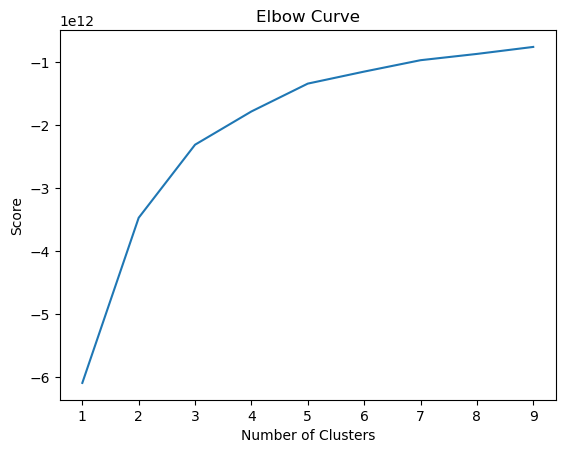

In [14]:
# To plot the elbow curve using pylab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### The optimal number of clusters is 5

## K-means clustering

In [15]:
# To create the kmeans object
kmeans = KMeans(n_clusters = 5) 

In [16]:
# To fit the kmeans object to the data
kmeans.fit(df_general)

KMeans(n_clusters=5)

In [17]:
# To make a column for cluster labels
df_general['Clusters']=kmeans.fit_predict(df_general)

In [18]:
df_general.head()

,Y_Sale_Price,X1_Electric_Range,X2_Base_MSRP,X3_Odometer_Reading,Clusters
0,20900,208,69900,87891,1
1,53870,14,45600,10,3
2,56015,15,55700,15,3
3,50840,14,90700,17322,2
4,14999,93,32250,28023,4


In [19]:
df_general['Clusters'].value_counts()

0    1168
2    1072
4    1053
3     683
1     537
Name: Clusters, dtype: int64

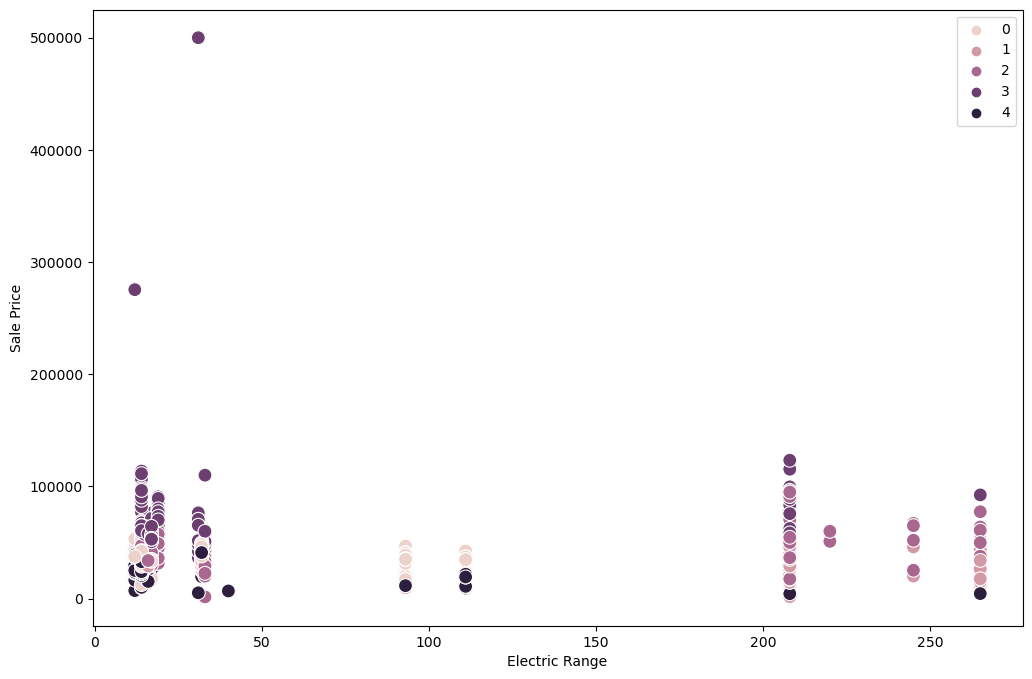

In [20]:
# To plot the clusters for Y_Sale_Price and X1_Electric_Range
plt.figure(figsize=(12,8))
ax=sns.scatterplot(x=df_general['X1_Electric_Range'],y=df_general['Y_Sale_Price'], hue=kmeans.labels_,s=100)
ax.grid=(False)
plt.xlabel('Electric Range')
plt.ylabel('Sale Price')
plt.show()

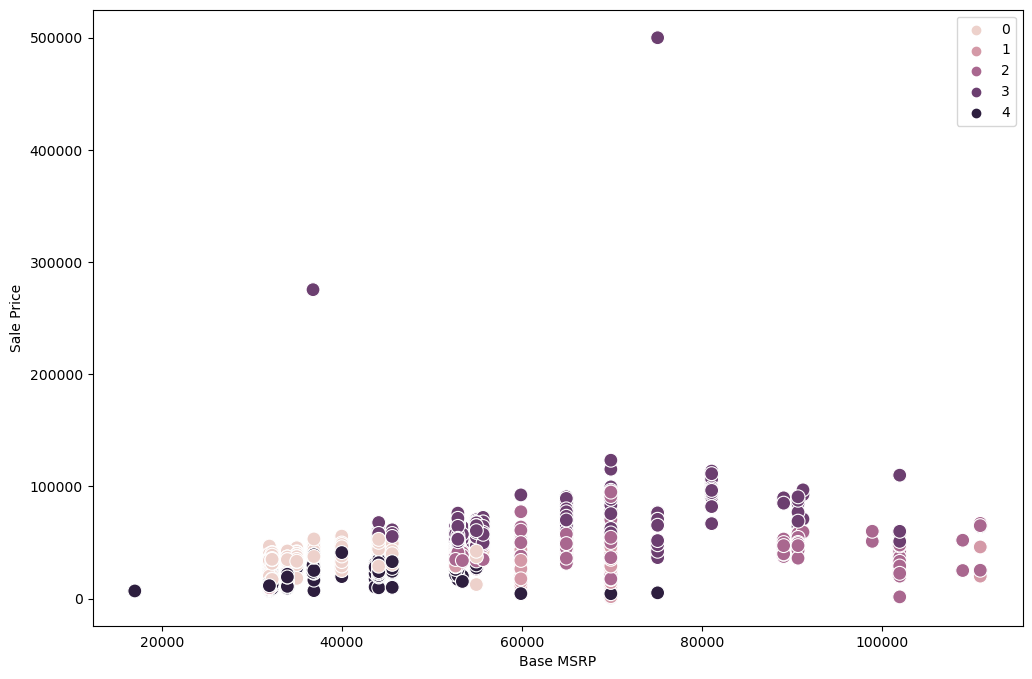

In [21]:
# To plot the cluster of Sale Price and Base MSRP
plt.figure(figsize=(12,8))
ax=sns.scatterplot(x=df_general['X2_Base_MSRP'],y=df_general['Y_Sale_Price'], hue=kmeans.labels_,s=100)
ax.grid=(False)
plt.xlabel('Base MSRP')
plt.ylabel('Sale Price')
plt.show()

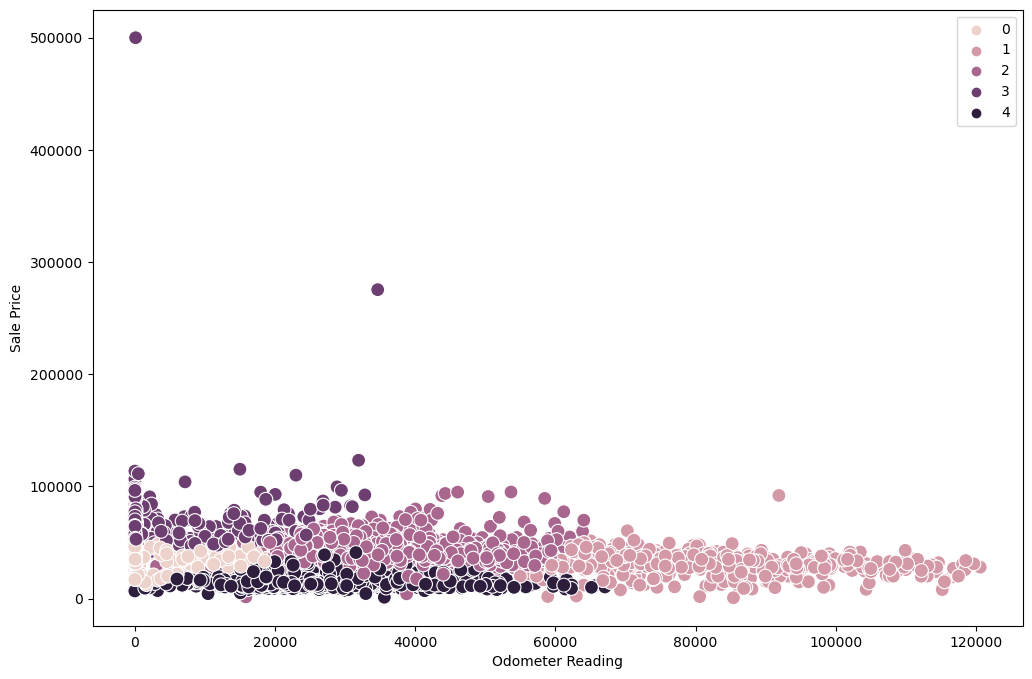

In [22]:
# To plot the cluster of Sale Price and Odometer Reading
plt.figure(figsize=(12,8))
ax=sns.scatterplot(x=df_general['X3_Odometer_Reading'],y=df_general['Y_Sale_Price'], hue=kmeans.labels_,s=100)
ax.grid=(False)
plt.xlabel('Odometer Reading')
plt.ylabel('Sale Price')
plt.show()

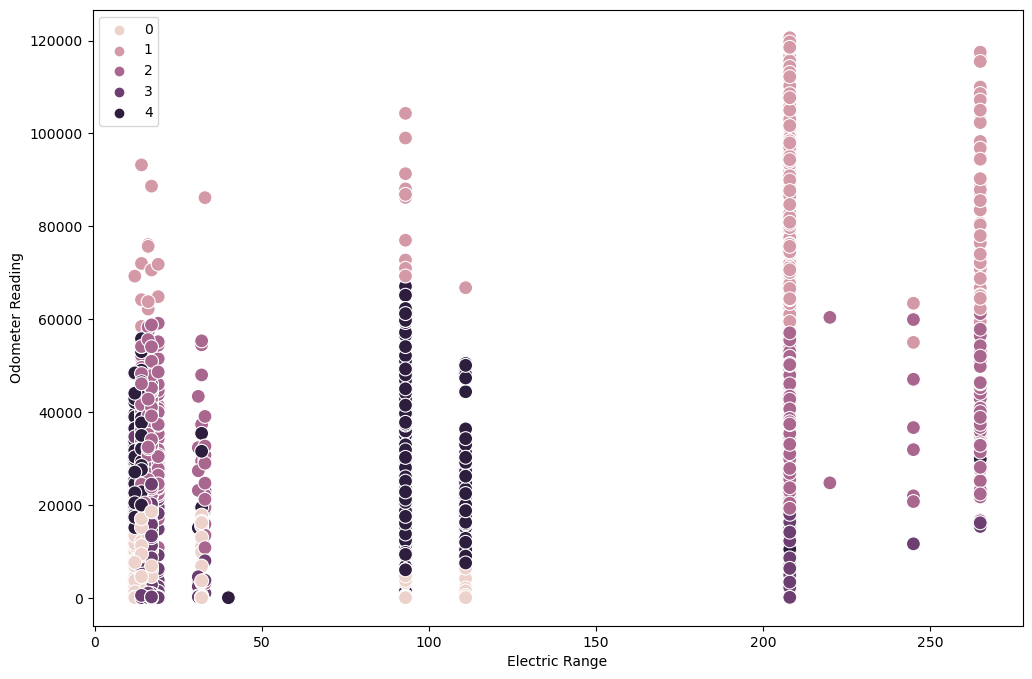

In [23]:
# To plot the cluster of Electric Range and Odometer Reading
plt.figure(figsize=(12,8))
ax=sns.scatterplot(x=df_general['X1_Electric_Range'],y=df_general['X3_Odometer_Reading'], hue=kmeans.labels_,s=100)
ax.grid=(False)
plt.xlabel('Electric Range')
plt.ylabel('Odometer Reading')
plt.show()

In [24]:
# To relabel the clusters from numbers to color names
df_general.loc[df_general['Clusters'] == 4, 'cluster'] = 'dark purple'
df_general.loc[df_general['Clusters'] == 3, 'cluster'] = 'medium purple'
df_general.loc[df_general['Clusters'] == 2, 'cluster'] = 'light purple'
df_general.loc[df_general['Clusters'] == 1, 'cluster'] = 'lilac'
df_general.loc[df_general['Clusters'] == 0, 'cluster'] = 'pink'

In [25]:
# To separate the data points in each cluster and calculate their descriptive statistics
df_general.groupby('cluster').agg({'Y_Sale_Price':['mean','median'],
                           'X1_Electric_Range':['mean','median'],
                           'X2_Base_MSRP':['mean','median'],
                           'X3_Odometer_Reading':['mean','median']})

Y_Sale_Price          X1_Electric_Range         X2_Base_MSRP  \
                       mean   median              mean median          mean   
cluster                                                                       
dark purple    17095.153846  14810.0         76.407407   93.0  34759.278253   
light purple   43304.775187  42000.0        152.664179  208.0  66798.791978   
lilac          31227.549348  31500.0        205.996276  208.0  67876.350093   
medium purple  63981.237189  59888.0         38.860908   17.0  59499.399707   
pink           37223.438356  36365.5         56.693493   32.0  36922.868151   

                       X3_Odometer_Reading           
                median                mean   median  
cluster                                              
dark purple    31950.0        25693.043685  24647.0  
light purple   69900.0        37842.619403  36924.0  
lilac          69900.0        81221.551210  79150.0  
medium purple  54950.0         3613.815520     48.0  
pink           34995.0         2111.974315     28.0

In [26]:
# To save df_general as a csv file for future Tableau visualizations and reporting
df_general.to_csv(os.path.join(path,'02 Data','Prepared Data','Cluster_Analysis_Set.csv'))

## A summary of clusters for possible EV market segmentation and future analysis

### Pink cluster: mid sale price, low electric range, mid base MSRP, low odometer reading
##### The reliable hybrid-These cars were probably purchased new given their low odometer readings and mid sales price. Their low electric range suggests they are probably hybrids. The owners of these cars might value fuel savings, but might not trust EV infrastructure or be highly environmentally motivated

### Dark purple cluster: low sale price, low mid electric range, mid base MSRP, mid odometer reading
##### The second-hand hybrid- These cars have secondhand pricing and secondhand mileage. Their previous owners might have bought them new and then sold them once the next best EV came out. Their current owners likely value both the fuel savings these vehicles offer as well as the low sales price. They may also be environmentally motivated.

### Light purple cluster: upper mid sale price, high electric range, high base MSRP, mid odometer reading
##### The electric commuter- These vehicles are on the high end of both price and electric range. They are likely used vehicles given their odometer reading, but are probably newer cars with more advanced battery technology. Their owners might be tech enthusiasts or environmentally motivated.

### Lilac cluster: mid sale price, high electric range, high base MSRP, high odometer reading
##### The road-tripper - The owners of these cars have taken advantage of their high electric range as is evident by their high odometer readings. They are also almost twice as expensive on average as vehicles in the light purple cluster, which might suggest the possibility that their owners might be more environmentally oriented than fuel cost savings oriented.

### Medium purple cluster: high sale price, low electric range, high base MSRP, low odometer reading
##### The Prestige- This cluster contains the most expensive vehicles in this data set and the low odometer readings suggest that they are new vehicles. The low electric range suggests that they might be hybrid vehicles. The owners of these vehicles might value their prestige, but either may not trust EV infrastructure enough for a fully electric vehicle or might view lower emissions or fuel costs as a lower priority.